<a href="https://colab.research.google.com/github/manic2man/Lambda-DSpt5-Unit-Projects/blob/master/MarshallShoots_Unit1_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
# At one point the website went down, but I had downloaded the dataset already
# I just wanted to use the url because it meant someone else could run this.
#url = 'https://bchi.bigcitieshealth.org/rails/active_storage/blobs/eyJfcmFpbHMiOnsibWVzc2FnZSI6IkJBaHBPUT09IiwiZXhwIjpudWxsLCJwdXIiOiJibG9iX2lkIn19--d420076690399fd28de697fa5a876e8b1d3188ac/BCHI-dataset_2019-03-04.csv?disposition=attachment'
#df = pd.read_csv(url)
df = pd.read_csv('/content/BCHI-dataset_2019-03-04.csv')
df.head()

,Indicator Category,Indicator,Year,Sex,Race/Ethnicity,Value,Place,BCHC Requested Methodology,Source,Methods,Notes,90% Confidence Level - Low,90% Confidence Level - High,95% Confidence Level - Low,95% Confidence Level - High
0,Behavioral Health/Substance Abuse,Opioid-Related Unintentional Drug Overdose Mor...,2010,Both,All,1.7,"Washington, DC",Age-Adjusted rate of opioid-related mortality ...,"D.C. Department of Health, Center for Policy, ...",NaN,This indicator is not exclusive of other drugs...,NaN,NaN,NaN,NaN
1,Behavioral Health/Substance Abuse,Opioid-Related Unintentional Drug Overdose Mor...,2010,Both,All,2.2,"Fort Worth (Tarrant County), TX",Age-adjusted rate of opioid-related mortality ...,National Center for Health Statistics,NaN,This indicator is not exclusive of other drugs...,NaN,NaN,1.5,3.0
2,Behavioral Health/Substance Abuse,Opioid-Related Unintentional Drug Overdose Mor...,2010,Both,All,2.3,"Oakland (Alameda County), CA",Age-adjusted rate of opioid-related mortality ...,CDC Wonder,Age-adjusted rate of opioid-related mortality ...,Data is for Alameda County. This indicator is ...,NaN,NaN,1.6,3.2
3,Behavioral Health/Substance Abuse,Opioid-Related Unintentional Drug Overdose Mor...,2010,Both,All,3.0,"San Antonio, TX",Age-adjusted rate of opioid-related mortality ...,CDC Wonder,NaN,This indicator is not exclusive of other drugs...,NaN,NaN,2.2,3.9
4,Behavioral Health/Substance Abuse,Opioid-Related Unintentional Drug Overdose Mor...,2010,Both,All,4.4,"U.S. Total, U.S. Total",Age-Adjusted rate of opioid-related mortality ...,CDC WONDER,NaN,This indicator is not exclusive of other drugs...,NaN,NaN,4.4,4.5


In [2]:
# I may change my mind later, but I want observations I can compare against each other,
# while camparing across different sexes and races may twist results
df1 = df[(df['Sex'] == 'Both') & (df['Race/Ethnicity'] == 'All')]
df1

,Indicator Category,Indicator,Year,Sex,Race/Ethnicity,Value,Place,BCHC Requested Methodology,Source,Methods,Notes,90% Confidence Level - Low,90% Confidence Level - High,95% Confidence Level - Low,95% Confidence Level - High
0,Behavioral Health/Substance Abuse,Opioid-Related Unintentional Drug Overdose Mor...,2010,Both,All,1.7,"Washington, DC",Age-Adjusted rate of opioid-related mortality ...,"D.C. Department of Health, Center for Policy, ...",NaN,This indicator is not exclusive of other drugs...,NaN,NaN,NaN,NaN
1,Behavioral Health/Substance Abuse,Opioid-Related Unintentional Drug Overdose Mor...,2010,Both,All,2.2,"Fort Worth (Tarrant County), TX",Age-adjusted rate of opioid-related mortality ...,National Center for Health Statistics,NaN,This indicator is not exclusive of other drugs...,NaN,NaN,1.5,3.0
2,Behavioral Health/Substance Abuse,Opioid-Related Unintentional Drug Overdose Mor...,2010,Both,All,2.3,"Oakland (Alameda County), CA",Age-adjusted rate of opioid-related mortality ...,CDC Wonder,Age-adjusted rate of opioid-related mortality ...,Data is for Alameda County. This indicator is ...,NaN,NaN,1.6,3.2
3,Behavioral Health/Substance Abuse,Opioid-Related Unintentional Drug Overdose Mor...,2010,Both,All,3.0,"San Antonio, TX",Age-adjusted rate of opioid-related mortality ...,CDC Wonder,NaN,This indicator is not exclusive of other drugs...,NaN,NaN,2.2,3.9
4,Behavioral Health/Substance Abuse,Opioid-Related Unintentional Drug Overdose Mor...,2010,Both,All,4.4,"U.S. Total, U.S. Total",Age-Adjusted rate of opioid-related mortality ...,CDC WONDER,NaN,This indicator is not exclusive of other drugs...,NaN,NaN,4.4,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34313,Social and Economic Factors,Percent Unemployed,2014,Both,All,10.9,"Chicago, Il",Percent of unemployment among population 16 an...,"US Census Bureau, American Community Survey 1-...",NaN,Place=Chicago was used to isolate American Com...,10.5,11.3,NaN,NaN
34314,Social and Economic Factors,Percent Unemployed,2014,Both,All,11.8,"Baltimore, MD",Percent of unemployment among population 16 an...,"US Census Bureau, American Community Survey 1-...",NaN,FIPS code 2404000 was used to isolate data for...,10.9,12.7,NaN,NaN
34315,Social and Economic Factors,Percent Unemployed,2014,Both,All,12.8,"Philadelphia, PA",Percent of unemployment among population 16 an...,"US Census Bureau, American Community Survey 1-...",NaN,FIPS code 4260000 was used to isolate data for...,12.0,13.6,NaN,NaN
34316,Social and Economic Factors,Percent Unemployed,2014,Both,All,18.4,"Cleveland, OH",Percent of unemployment among population 16 an...,"US Census Bureau, American Community Survey 1-...",NaN,FIPS code 3916000 was used to isolate data for...,17.1,19.7,NaN,NaN


In [3]:
df_slim = df1[['Place', 'Year', 'Indicator', 'Value']]
df_slim

,Place,Year,Indicator,Value
0,"Washington, DC",2010,Opioid-Related Unintentional Drug Overdose Mor...,1.7
1,"Fort Worth (Tarrant County), TX",2010,Opioid-Related Unintentional Drug Overdose Mor...,2.2
2,"Oakland (Alameda County), CA",2010,Opioid-Related Unintentional Drug Overdose Mor...,2.3
3,"San Antonio, TX",2010,Opioid-Related Unintentional Drug Overdose Mor...,3.0
4,"U.S. Total, U.S. Total",2010,Opioid-Related Unintentional Drug Overdose Mor...,4.4
...,...,...,...,...
34313,"Chicago, Il",2014,Percent Unemployed,10.9
34314,"Baltimore, MD",2014,Percent Unemployed,11.8
34315,"Philadelphia, PA",2014,Percent Unemployed,12.8
34316,"Cleveland, OH",2014,Percent Unemployed,18.4


In [4]:
# Just picking out my variables
# Heart Disease Mortality Rate (Age-Adjusted; Per 100,000 people)
# Diabetes Mortality Rate (Age-Adjusted; Per 100,000 people)
# All Types of Cancer Mortality Rate (Age-Adjusted; Per 100,000 people)
# Suicide Rate (Age-Adjusted; Per 100,000 people)
# Percent of Population Uninsured
# Percent of Adults Who Meet CDC-Recommended Physical Activity Levels
df_slim.Indicator.value_counts()

Percent of Households Whose Housing Costs Exceed 35% of Income                                         165
Total Population (People)                                                                              145
Persons Living with HIV/AIDS Rate (Per 100,000 people)                                                 145
Percent Who Only Speak English at Home                                                                 145
Percent of Population Under 18                                                                         143
Heart Disease Mortality Rate (Age-Adjusted; Per 100,000 people)                                        143
Percent of 3 and 4 Year Olds Currently Enrolled in Preschool                                           142
Percent Who Speak Spanish at Home                                                                      142
Diabetes Mortality Rate (Age-Adjusted; Per 100,000 people)                                             142
Percent of Population with a Disabili

In [5]:
df_small = df_slim[df_slim['Indicator'].isin(['Heart Disease Mortality Rate (Age-Adjusted; Per 100,000 people)',
                                              'Diabetes Mortality Rate (Age-Adjusted; Per 100,000 people)',
                                              'All Types of Cancer Mortality Rate (Age-Adjusted; Per 100,000 people)',
                                              'Suicide Rate (Age-Adjusted; Per 100,000 people)',
                                              'Percent of Population Uninsured',
                                              'Percent of Adults Who Meet CDC-Recommended Physical Activity Levels'])]
df_small['Indicator'].value_counts()

Heart Disease Mortality Rate (Age-Adjusted; Per 100,000 people)          143
Diabetes Mortality Rate (Age-Adjusted; Per 100,000 people)               142
All Types of Cancer Mortality Rate (Age-Adjusted; Per 100,000 people)    140
Percent of Population Uninsured                                          131
Suicide Rate (Age-Adjusted; Per 100,000 people)                          126
Percent of Adults Who Meet CDC-Recommended Physical Activity Levels       60
Name: Indicator, dtype: int64

In [6]:
df_small.head()

,Place,Year,Indicator,Value
1465,"Los Angeles, CA",2010,All Types of Cancer Mortality Rate (Age-Adjust...,88.5
1466,"Phoenix, AZ",2010,All Types of Cancer Mortality Rate (Age-Adjust...,98.0
1467,"Miami (Miami-Dade County), FL",2010,All Types of Cancer Mortality Rate (Age-Adjust...,140.1
1468,"San Francisco, CA",2010,All Types of Cancer Mortality Rate (Age-Adjust...,149.9
1469,"Seattle, WA",2010,All Types of Cancer Mortality Rate (Age-Adjust...,156.7


In [7]:
df_small.shape

(742, 4)

In [8]:
pd.options.display.max_rows = 999
df_wide = df_small.pivot_table(index=['Place', 'Year'], columns='Indicator', values='Value').reset_index()
df_wide

Indicator,Place,Year,"All Types of Cancer Mortality Rate (Age-Adjusted; Per 100,000 people)","Diabetes Mortality Rate (Age-Adjusted; Per 100,000 people)","Heart Disease Mortality Rate (Age-Adjusted; Per 100,000 people)",Percent of Adults Who Meet CDC-Recommended Physical Activity Levels,Percent of Population Uninsured,"Suicide Rate (Age-Adjusted; Per 100,000 people)"
0,"Austin, TX",2015,NaN,NaN,NaN,NaN,14.4,NaN
1,"Austin, TX",2016,NaN,NaN,NaN,NaN,13.1,NaN
2,"Baltimore, MD",2010,NaN,NaN,NaN,68.40,NaN,NaN
3,"Baltimore, MD",2011,NaN,NaN,NaN,68.40,NaN,NaN
4,"Baltimore, MD",2012,213.9,NaN,241.6,68.60,12.3,NaN
5,"Baltimore, MD",2013,NaN,NaN,NaN,NaN,10.7,NaN
6,"Baltimore, MD",2014,NaN,NaN,NaN,NaN,8.5,NaN
7,"Baltimore, MD",2015,NaN,NaN,NaN,NaN,7.6,NaN
8,"Baltimore, MD",2016,NaN,NaN,NaN,NaN,6.8,NaN
9,"Boston, MA",2010,184.1,12.9,139.4,NaN,NaN,7.8


In [9]:
df_clean = df_wide.copy()
df_clean['Cancer'] = df_clean['All Types of Cancer Mortality Rate (Age-Adjusted; Per 100,000 people)']
df_clean['Diabetes'] = df_clean['Diabetes Mortality Rate (Age-Adjusted; Per 100,000 people)']
df_clean['Heart Disease'] = df_clean['Heart Disease Mortality Rate (Age-Adjusted; Per 100,000 people)']
df_clean['Suicide'] = df_clean['Suicide Rate (Age-Adjusted; Per 100,000 people)']
df_clean = df_clean[['Percent of Adults Who Meet CDC-Recommended Physical Activity Levels',
                     'Percent of Population Uninsured',
                     'Cancer','Diabetes','Heart Disease', 'Suicide']]
df_clean.head()

Indicator,Percent of Adults Who Meet CDC-Recommended Physical Activity Levels,Percent of Population Uninsured,Cancer,Diabetes,Heart Disease,Suicide
0,NaN,14.4,NaN,NaN,NaN,NaN
1,NaN,13.1,NaN,NaN,NaN,NaN
2,68.4,NaN,NaN,NaN,NaN,NaN
3,68.4,NaN,NaN,NaN,NaN,NaN
4,68.6,12.3,213.9,NaN,241.6,NaN


In [10]:
df_exercise = pd.melt(df_clean, id_vars='Percent of Adults Who Meet CDC-Recommended Physical Activity Levels', value_vars=['Cancer',	'Diabetes',	'Heart Disease',	'Suicide']).dropna()
df_exercise = df_exercise.rename(columns={'Indicator':'Cause', 'value': 'Deaths per 100,000 people'})
df_exercise

,Percent of Adults Who Meet CDC-Recommended Physical Activity Levels,Cause,"Deaths per 100,000 people"
4,68.60,Cancer,213.9
12,24.20,Cancer,175.7
14,18.80,Cancer,162.6
21,50.70,Cancer,182.5
35,43.30,Cancer,196.0
37,50.10,Cancer,200.7
39,50.30,Cancer,213.2
47,61.70,Cancer,174.1
49,57.40,Cancer,177.6
51,59.10,Cancer,162.8


In [11]:
df_uninsured = pd.melt(df_clean, id_vars='Percent of Population Uninsured', value_vars=['Cancer',	'Diabetes',	'Heart Disease',	'Suicide']).dropna()
df_uninsured = df_uninsured.rename(columns={'Indicator':'Cause', 'value': 'Deaths per 100,000 people'})
df_uninsured

,Percent of Population Uninsured,Cause,"Deaths per 100,000 people"
4,12.3,Cancer,213.9
13,5.1,Cancer,153.1
22,19.2,Cancer,186.1
23,19.7,Cancer,187.2
31,11.8,Cancer,218.3
40,7.1,Cancer,198.4
48,16.7,Cancer,177.6
49,15.7,Cancer,177.6
50,12.4,Cancer,160.7
51,11.3,Cancer,162.8


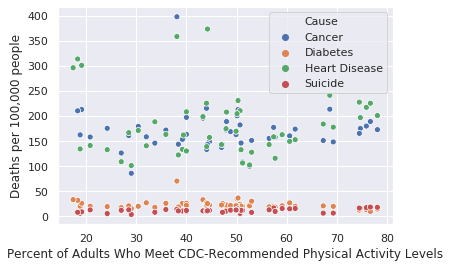

In [13]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

ax = sns.scatterplot(x="Percent of Adults Who Meet CDC-Recommended Physical Activity Levels",
                     y="Deaths per 100,000 people",
                     hue="Cause",
                     data=df_exercise)


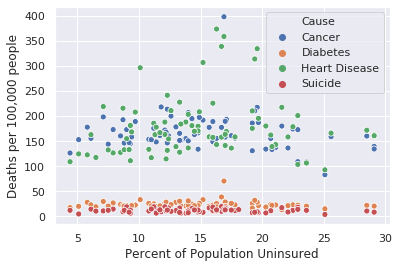

In [14]:
ax = sns.scatterplot(x="Percent of Population Uninsured",
                     y="Deaths per 100,000 people",
                     hue="Cause",
                     data=df_uninsured)